In [1]:
%load_ext autoreload
%autoreload 2

In [37]:
import torch
import torch.nn as nn
import icnn
import numpy as np
from matplotlib import pyplot as plt
import torch.optim as optim

## Generate data

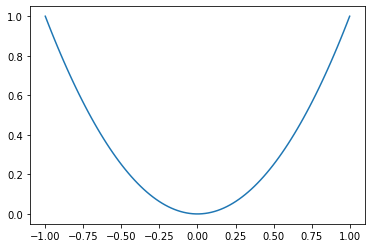

In [94]:
x = torch.linspace(-1, 1, 100, dtype=torch.double)
y = -x ** 2
_, = plt.plot(x, y)

In [103]:
num_epoch = 2000
model = icnn.ICNN(1, [100, 5, 1])
lr = 0.01
lossfn = nn.MSELoss()
verbose = True

optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.CosineAnnealingLR(
          optimizer, num_epoch)
for epoch in range(num_epoch):
    model.zero_grad()
    yhat = model.forward(x.unsqueeze(0))
    loss = lossfn(yhat, y.unsqueeze(0))    
    if(verbose and epoch % 100 == 0):
        print('Epoch: {} \t Loss: {}'.format(epoch+1, loss.item()))
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 10)
    optimizer.step()
    scheduler.step()


/home/fengjun/.virtualenvs/general/lib/python3.8/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([1, 100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1 	 Loss: 109446.09798352484
Epoch: 101 	 Loss: 0.2934285638288369
Epoch: 201 	 Loss: 0.12939000025346487
Epoch: 301 	 Loss: 0.1096091558714664
Epoch: 401 	 Loss: 0.1023126017977689
Epoch: 501 	 Loss: 0.09886349219608064
Epoch: 601 	 Loss: 0.09698364932152251
Epoch: 701 	 Loss: 0.09585812509265437
Epoch: 801 	 Loss: 0.09513822247567003
Epoch: 901 	 Loss: 0.09465512547216476
Epoch: 1001 	 Loss: 0.09431943399261537
Epoch: 1101 	 Loss: 0.09408040981185167
Epoch: 1201 	 Loss: 0.09390770672065336
Epoch: 1301 	 Loss: 0.09378234488200711
Epoch: 1401 	 Loss: 0.09369199048461273
Epoch: 1501 	 Loss: 0.093628299674168
Epoch: 1601 	 Loss: 0.09358534875541166
Epoch: 1701 	 Loss: 0.0935586319310841
Epoch: 1801 	 Loss: 0.09354434247639816
Epoch: 1901 	 Loss: 0.09353879781772208


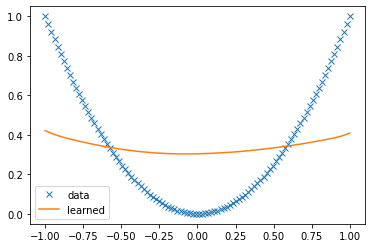

In [104]:
_, = plt.plot(x, y, 'x', label='data')
yhat = model.forward(x.unsqueeze(0)).detach()
plt.plot(x, yhat, label='learned')
_ = plt.legend()

In [ ]:
from __future__ import print_function, division
import quadrotortrajectorygen as quadtraj

# Define the trajectory starting state:
pos0 = [0, 0, 2]  # position
vel0 = [0, 0, 0]  # velocity
acc0 = [0, 0, 0]  # acceleration

# Define the goal state:
posf = [1, 0, 1]  # position
velf = [0, 0, 1]  # velocity
accf = [0, 9.81, 0]  # acceleration

# Define the duration:
Tf = 1

# Define the input limits:
fmin = 5  # [m/s**2]
fmax = 25  # [m/s**2]
wmax = 20  # [rad/s]
minTimeSec = 0.02  # [s]

# Define how gravity lies:
gravity = [0, 0, -9.81]

traj = quadtraj.RapidTrajectory(pos0, vel0, acc0, gravity)
traj.set_goal_position(posf)
traj.set_goal_velocity(velf)
traj.set_goal_acceleration(accf)

# Note: if you'd like to leave some states free, there are two options to
# encode this. As an example, we will be leaving the velocity in `x` (axis 0)
# free:
#
# Option 1:
# traj.set_goal_velocity_in_axis(1,velf_y);
# traj.set_goal_velocity_in_axis(2,velf_z);
#
# Option 2:
# traj.set_goal_velocity([None, velf_y, velf_z])

# Run the algorithm, and generate the trajectory.
traj.generate(Tf)

# Test input feasibility
inputsFeasible = traj.check_input_feasibility(fmin, fmax, wmax, minTimeSec)

# Test whether we fly into the floor
floorPoint = [0, 0, 0]  # a point on the floor
floorNormal = [0, 0, 1]  # we want to be in this direction of the point (upwards)
positionFeasible = traj.check_position_feasibility(floorPoint, floorNormal)

for i in range(3):
    print("Axis #", i)
    print("\talpha = ", traj.get_param_alpha(i), "\tbeta = ", traj.get_param_beta(i), "\tgamma = ",
          traj.get_param_gamma(i))
print("Total cost = ", traj.get_cost())
print("Input feasibility result: ", quadtraj.InputFeasibilityResult.to_string(inputsFeasible), "(", inputsFeasible, ")")
print("Position feasibility result: ", quadtraj.StateFeasibilityResult.to_string(positionFeasible), "(",
      positionFeasible, ")")
